In [ ]:
%autosave 10

**First, create a dataframe of *cleaned_data.csv*. Then, use scikit-learn's `train_test_split` to make a new set of training and testing data. This time, instead of `EDUCATION`, use `LIMIT_BAL`: the account's credit limit.**

In [15]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

data=pd.read_csv(r'C:\Users\Shridhar\Desktop\cleaned_data.csv')

X_train,X_test,Y_train,Y_test=train_test_split(data['LIMIT_BAL'].values.reshape(-1,1),data['default payment next month'].values,test_size=0.2,random_state=24)

_________________________________________________________________________
**Next, train a logistic regression model using the training data from your split.**


In [16]:
model = LogisticRegression(C=0.1)
model.fit(X_train,Y_train)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

_________________________________________________________________________
**Then, create the array of predicted probabilities for the testing data.**


In [17]:
Y_predict_proba=model.predict_proba(X_test)
Y_predict_proba

array([[0.74826949, 0.25173051],
       [0.5842971 , 0.4157029 ],
       [0.7960448 , 0.2039552 ],
       ...,
       [0.5842971 , 0.4157029 ],
       [0.82721525, 0.17278475],
       [0.66393453, 0.33606547]])

_________________________________________________________________________
**Next, calculate the ROC AUC using the predicted probabilities and the true labels of the testing data. Compare this to the ROC AUC from using the `EDUCATION` feature.**


In [29]:
from sklearn import metrics
pos_proba=Y_predict_proba[:,1]
fpr, tpr, thresholds = metrics.roc_curve(Y_test, pos_proba)

_________________________________________________________________________
**Now, plot the ROC curve.**


Text(0.5, 1.0, 'ROC curve')

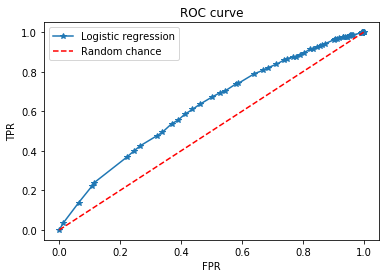

In [31]:
import matplotlib.pyplot as plt 
%matplotlib inline
plt.plot(fpr, tpr, '*-')
plt.plot([0, 1], [0, 1], 'r--')
plt.legend(['Logistic regression', 'Random chance'])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')

_________________________________________________________________________
**Then, calculate the data for the precision-recall curve on the testing data using scikit-learn functionality.**


In [33]:
fpr, tpr, thresholds = metrics.roc_curve(Y_test, X_test)

_________________________________________________________________________
**Plot the precision-recall curve using matplotlib.**


Text(0.5, 1.0, 'ROC curve')

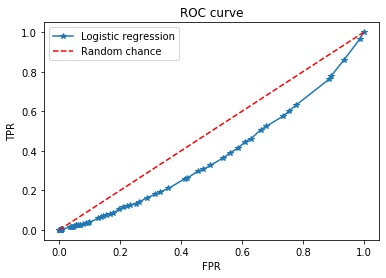

In [34]:
plt.plot(fpr, tpr, '*-')
plt.plot([0, 1], [0, 1], 'r--')
plt.legend(['Logistic regression', 'Random chance'])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')

_________________________________________________________________________
**Now, use scikit-learn to calculate the area under the precision-recall curve.**


In [35]:
metrics.roc_auc_score(Y_test,pos_proba)

0.6201990844642832

_________________________________________________________________________
**Finally, recalculate the ROC AUC, except this time do it for the training data.**

In [36]:
metrics.roc_auc_score(Y_test,X_test)

0.3798009155357168

    How is this different, conceptually and quantitatively, from your earlier calculation?
